# 1. 데이터 살피기

In [75]:
import pandas as pd
import numpy as np
import re
pd.set_option('display.max_columns', 25)

df = pd.read_json(os.path.join("..","..","data","TA_User_Review_Seoul_all_v2.json"))
df.head()

,__typename,createdDate,helpfulVotes,id,language,location.__typename,location.additionalNames.long,location.additionalNames.longOnlyParent,location.locationId,location.name,location.parent.additionalNames.long,location.parent.locationId,...,socialStatistics.isReposted,socialStatistics.isSaved,socialStatistics.likeCount,socialStatistics.repostCount,socialStatistics.tripCount,text,title,userId,userProfile.contributionCounts.sumAllUgc,userProfile.isMe,userProfile.isVerified,userProfile.userId
0,Review,2020-03-06,0,749418557,ja,LocationInformation,"Hotel Gracery Seoul, South Korea",South Korea,14159911,Hotel Gracery Seoul,"Seoul, South Korea",294197,...,False,False,0,0,0,日系のホテルなので日本語OK\n南大門も明洞も歩いて行けます\nトリプルルーム お部屋は狭め...,グレイスリーホテルソウル,E44FFBC7D1E0A97FECCCF7F8EB052E0C,8,0,0,E44FFBC7D1E0A97FECCCF7F8EB052E0C
1,Review,2020-03-01,0,748454819,en,LocationInformation,"Hotel Gracery Seoul, South Korea",South Korea,14159911,Hotel Gracery Seoul,"Seoul, South Korea",294197,...,False,False,0,0,0,I really enjoyed our stay here in Gracery Hote...,Great Hotel,F9AD0C1F6409A1574AD0AFC237D2A4CE,7,0,0,F9AD0C1F6409A1574AD0AFC237D2A4CE
2,Review,2020-02-16,0,745371386,ja,LocationInformation,"Hotel Gracery Seoul, South Korea",South Korea,14159911,Hotel Gracery Seoul,"Seoul, South Korea",294197,...,False,False,0,0,0,今回はagoda経由で予約しました。予約後に日系のホテルと知った次第です。\nチェックイン後...,安心出来ます,770775D59B126E71D38D56FAB9B95F93,57,0,0,770775D59B126E71D38D56FAB9B95F93
3,Review,2020-02-11,0,744426202,ja,LocationInformation,"Hotel Gracery Seoul, South Korea",South Korea,14159911,Hotel Gracery Seoul,"Seoul, South Korea",294197,...,False,False,0,0,0,こちらのホテルは夫婦で何度か利用させていただいてます。立地もいいですが、お風呂とトイレが別な...,やはり落ち着く,4F1BF9403CA4EB27756E0C824A088553,43,0,0,4F1BF9403CA4EB27756E0C824A088553
4,Review,2020-02-05,0,743141310,en,LocationInformation,"Hotel Gracery Seoul, South Korea",South Korea,14159911,Hotel Gracery Seoul,"Seoul, South Korea",294197,...,False,False,0,0,0,Its about 7 minutes walking distance to City H...,"Ask for higher floor, it has better city view",23EF5413495FF530151DB7E5C0FEF38D,225,0,0,23EF5413495FF530151DB7E5C0FEF38D


In [76]:
df.columns

Index(['__typename', 'createdDate', 'helpfulVotes', 'id', 'language',
       'location.__typename', 'location.additionalNames.long',
       'location.additionalNames.longOnlyParent', 'location.locationId',
       'location.name', 'location.parent.additionalNames.long',
       'location.parent.locationId', 'location.parentGeoId',
       'location.placeType', 'photoIds', 'photos', 'rating',
       'socialStatistics.followCount', 'socialStatistics.isFollowing',
       'socialStatistics.isLiked', 'socialStatistics.isReposted',
       'socialStatistics.isSaved', 'socialStatistics.likeCount',
       'socialStatistics.repostCount', 'socialStatistics.tripCount', 'text',
       'title', 'userId', 'userProfile.contributionCounts.sumAllUgc',
       'userProfile.isMe', 'userProfile.isVerified', 'userProfile.userId'],
      dtype='object')

In [77]:
df.iloc[:5,:10]

,__typename,createdDate,helpfulVotes,id,language,location.__typename,location.additionalNames.long,location.additionalNames.longOnlyParent,location.locationId,location.name
0,Review,2020-03-06,0,749418557,ja,LocationInformation,"Hotel Gracery Seoul, South Korea",South Korea,14159911,Hotel Gracery Seoul
1,Review,2020-03-01,0,748454819,en,LocationInformation,"Hotel Gracery Seoul, South Korea",South Korea,14159911,Hotel Gracery Seoul
2,Review,2020-02-16,0,745371386,ja,LocationInformation,"Hotel Gracery Seoul, South Korea",South Korea,14159911,Hotel Gracery Seoul
3,Review,2020-02-11,0,744426202,ja,LocationInformation,"Hotel Gracery Seoul, South Korea",South Korea,14159911,Hotel Gracery Seoul
4,Review,2020-02-05,0,743141310,en,LocationInformation,"Hotel Gracery Seoul, South Korea",South Korea,14159911,Hotel Gracery Seoul


In [78]:
df.iloc[:5,10:20]

,location.parent.additionalNames.long,location.parent.locationId,location.parentGeoId,location.placeType,photoIds,photos,rating,socialStatistics.followCount,socialStatistics.isFollowing,socialStatistics.isLiked
0,"Seoul, South Korea",294197,294197,ACCOMMODATION,[],[],4,0,False,False
1,"Seoul, South Korea",294197,294197,ACCOMMODATION,[453807126],"[{'id': 453807126, 'statuses': ['PENDING'], 'p...",5,0,False,False
2,"Seoul, South Korea",294197,294197,ACCOMMODATION,[],[],5,0,False,False
3,"Seoul, South Korea",294197,294197,ACCOMMODATION,[],[],5,0,False,False
4,"Seoul, South Korea",294197,294197,ACCOMMODATION,[],[],5,0,False,False


In [79]:
df.iloc[:5,20:30]

,socialStatistics.isReposted,socialStatistics.isSaved,socialStatistics.likeCount,socialStatistics.repostCount,socialStatistics.tripCount,text,title,userId,userProfile.contributionCounts.sumAllUgc,userProfile.isMe
0,False,False,0,0,0,日系のホテルなので日本語OK\n南大門も明洞も歩いて行けます\nトリプルルーム お部屋は狭め...,グレイスリーホテルソウル,E44FFBC7D1E0A97FECCCF7F8EB052E0C,8,0
1,False,False,0,0,0,I really enjoyed our stay here in Gracery Hote...,Great Hotel,F9AD0C1F6409A1574AD0AFC237D2A4CE,7,0
2,False,False,0,0,0,今回はagoda経由で予約しました。予約後に日系のホテルと知った次第です。\nチェックイン後...,安心出来ます,770775D59B126E71D38D56FAB9B95F93,57,0
3,False,False,0,0,0,こちらのホテルは夫婦で何度か利用させていただいてます。立地もいいですが、お風呂とトイレが別な...,やはり落ち着く,4F1BF9403CA4EB27756E0C824A088553,43,0
4,False,False,0,0,0,Its about 7 minutes walking distance to City H...,"Ask for higher floor, it has better city view",23EF5413495FF530151DB7E5C0FEF38D,225,0


In [80]:
df.iloc[:5,30:40]

,userProfile.isVerified,userProfile.userId
0,0,E44FFBC7D1E0A97FECCCF7F8EB052E0C
1,0,F9AD0C1F6409A1574AD0AFC237D2A4CE
2,0,770775D59B126E71D38D56FAB9B95F93
3,0,4F1BF9403CA4EB27756E0C824A088553
4,0,23EF5413495FF530151DB7E5C0FEF38D


# 2. 데이터 전처리

In [90]:
# 사용할 피쳐만 뽑기 
using_cols = ['userId', 'language', 'photoIds', 'location.locationId','rating', 'location.name', 'location.placeType', 'createdDate']

data = df.loc[:,using_cols]
# 'ACCOMMODATION', 'EATERY' 만 사용
data = data.loc[data['location.placeType'].isin(['ACCOMMODATION', 'EATERY'])]
print(data.shape) 
data.head()

(137490, 8)


,userId,language,photoIds,location.locationId,rating,location.name,location.placeType,createdDate
0,E44FFBC7D1E0A97FECCCF7F8EB052E0C,ja,[],14159911,4,Hotel Gracery Seoul,ACCOMMODATION,2020-03-06
1,F9AD0C1F6409A1574AD0AFC237D2A4CE,en,[453807126],14159911,5,Hotel Gracery Seoul,ACCOMMODATION,2020-03-01
2,770775D59B126E71D38D56FAB9B95F93,ja,[],14159911,5,Hotel Gracery Seoul,ACCOMMODATION,2020-02-16
3,4F1BF9403CA4EB27756E0C824A088553,ja,[],14159911,5,Hotel Gracery Seoul,ACCOMMODATION,2020-02-11
4,23EF5413495FF530151DB7E5C0FEF38D,en,[],14159911,5,Hotel Gracery Seoul,ACCOMMODATION,2020-02-05


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137490 entries, 0 to 144428
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   userId               137490 non-null  object
 1   language             137490 non-null  object
 2   photoIds             137490 non-null  object
 3   location.locationId  137490 non-null  int64 
 4   rating               137490 non-null  int64 
 5   location.name        137490 non-null  object
 6   location.placeType   137490 non-null  object
 7   createdDate          137490 non-null  object
dtypes: int64(2), object(6)
memory usage: 9.4+ MB


In [92]:
# 내국인 외국인 (language 기준 분리)
data['islocal'] = data['language'].apply(lambda x: 1 if x=='ko' else 0)
data = data.drop(['language'], axis=1)
# 날짜 '-' 제거
data['createdDate'] = data['createdDate'].apply(lambda x: x.replace('-',''))
data['createdDate'] = data['createdDate'].astype(int)
# userId int 화
dff = data.groupby('userId')['userId'].agg([('user_reviewcount','count')]).reset_index()
dff = dff.reset_index()
dff.rename(columns = {'index':'userID'}, inplace=True)
dff = pd.merge(dff, data, on='userId')
dff.drop(['userId'], axis=1, inplace=True)
data = dff.copy()
# photo review 개수
data['photonum'] = data['photoIds'].apply(lambda x: len(x))
data = data.drop(['photoIds'], axis=1)
# 유저별 평균 rating
dff2 = data.groupby('userID')['rating'].agg([('users_mean_rating','mean')]).reset_index()
data = pd.merge(dff2, data, on='userID')

# column 명 변경
data.rename(columns = {'location.locationId':'locationId', 'location.name':'location_name', 'userProfile.contributionCounts.sumAllUgc':'users_sumAllUgc', 'location.placeType':'placeType'}, inplace = True)

print(data.shape)
print(data.columns)
data.head()

(137490, 10)
Index(['userID', 'users_mean_rating', 'user_reviewcount', 'locationId',
       'rating', 'location_name', 'placeType', 'createdDate', 'islocal',
       'photonum'],
      dtype='object')


,userID,users_mean_rating,user_reviewcount,locationId,rating,location_name,placeType,createdDate,islocal,photonum
0,0,5.0,1,3656150,5,Nine Tree Hotel Myeong-dong,ACCOMMODATION,20140121,0,0
1,1,5.0,1,301253,5,The Shilla Seoul,ACCOMMODATION,20161005,0,2
2,2,5.0,1,306139,5,"THE PLAZA Seoul, Autograph Collection",ACCOMMODATION,20140324,0,0
3,3,4.2,10,4071058,5,Seven Springs Gwanghwamun,EATERY,20161113,1,0
4,3,4.2,10,11959139,5,Mies Container City Outlet,EATERY,20170405,1,1


In [94]:
data.to_csv(os.path.join("..","..","data","TA_User_Reviws_Korea_all_v2_new_df.csv"))

# 3. Modeling

## Data Feature  
- userID : 사용자 id 
- locationId : 장소 id
- rating : 평점   
- users_mean_rating : 사용자별 평균 rating
- location_name : 장소 명
- placeType : 장소 타입 (숙박 / 식당)
- user_reviewcount : 사용자별 리뷰 작성 
- createdDate : 작성일 
- islocal : 작성인의 한국인 / 외국인
- photonum : 리뷰별 사진 개수 
   


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.externals import joblib 
import pickle

import tensorflow as tf
from keras.layers import *
from keras.regularizers import *
from keras.optimizers import *
from keras.models import *
from keras.preprocessing.text import *
from keras.callbacks import EarlyStopping
import keras.backend as K
from keras.utils.vis_utils import model_to_dot
from IPython.display import Image

import random
random.seed(42)

Using TensorFlow backend.


In [2]:
new_df = pd.read_csv(os.path.join("..","..","data","TA_User_Reviws_Korea_all_v2_new_df.csv"))
new_df = new_df.drop(['location_name'], axis=1)
new_df.head()

,Unnamed: 0,userID,users_mean_rating,user_reviewcount,locationId,rating,placeType,createdDate,islocal,photonum
0,0,0,5.0,1,3656150,5,ACCOMMODATION,20140121,0,0
1,1,1,5.0,1,301253,5,ACCOMMODATION,20161005,0,2
2,2,2,5.0,1,306139,5,ACCOMMODATION,20140324,0,0
3,3,3,4.2,10,4071058,5,EATERY,20161113,1,0
4,4,3,4.2,10,11959139,5,EATERY,20170405,1,1


### 로컬 / 글로벌 데이터 분리

In [9]:
# 로컬 / 글로벌 데이터 분리
local_df = new_df.loc[new_df['islocal']==1]
global_df = new_df.loc[new_df['islocal']==0]
print('local_df shape:',local_df.shape, 'global_df shape :',global_df.shape)

local_df shape: (43294, 10) global_df shape : (94196, 10)


## 1. local_modeling

In [4]:
def get_data(column, df) :
    
    vocab = {}
    num = 0

    for i in df[column]: # np.hstack([train[column], test[column]]): 
        if vocab.get(i) != None:
            continue

        vocab[i] = num
        num += 1

    encoded = [vocab[i] for i in df[column]]
    # encoded_d = [vocab[i] for i in test[column]]
    
    return encoded, num, vocab

In [5]:
encoded_userID, num_userID, vocab_userID = get_data('userID', local_df)

encoded_users_mean_rating, num_users_mean_rating, vocab_users_mean_rating = get_data('users_mean_rating', local_df)

encoded_user_reviewcount,  num_user_reviewcount, vocab_user_reviewcount = get_data('user_reviewcount', local_df)

encoded_locationId, num_locationId, vocab_locationId = get_data('locationId', local_df)
encoded_placeType,  num_placeType, vocab_placeType = get_data('placeType', local_df)

encoded_createdDate,  num_createdDate, vocab_createdDate = get_data('createdDate', local_df)
encoded_photonum,  num_photonum, vocab_photonum = get_data('photonum', local_df)

In [6]:
def trans_mul(vects):
    z = tf.reshape(vects,(-1,n_factors,1))
    return z 

def concat_shape2D(vects):
    a1,a2,a3,a4,a5,a6,a7 = vects 
    z = tf.concat([a1,a2],axis=2)
    z = tf.concat([z,a3],axis=2)
    z = tf.concat([z,a4],axis=2)
    z = tf.concat([z,a5],axis=2)
    z = tf.concat([z,a6],axis=2)
    z = tf.concat([z,a7],axis=2)
    return z

def sum_layer(vects):
    a1,a2,a3,a4,a5,a6,a7 = vects
    z = tf.add(a1,a2)
    z = tf.add(z,a3) 
    z = tf.add(z,a4)
    z = tf.add(z,a5)
    z = tf.add(z,a6)
    z = tf.add(z,a7)
    return z 

# Input Data

In [7]:
n_factors = 8
layers = [16,8, 4]

# Input variables
userID = Input(shape=(1,), dtype='int64', name = 'userID')

users_mean_rating = Input(shape=(1,), dtype='int64', name = 'users_mean_rating')

user_reviewcount = Input(shape=(1,), dtype='int64', name = 'user_reviewcount')

locationId = Input(shape=(1,), dtype='int64', name = 'locationId')
placeType = Input(shape=(1,), dtype='int64', name = 'placeType')

createdDate = Input(shape=(1,), dtype='int64', name = 'createdDate')
photonum = Input(shape=(1,), dtype='int64', name = 'photonum')

In [10]:
FM_userID = Embedding(input_dim = num_userID, output_dim = n_factors, 
                              name = 'FM_userID', input_length=1)(userID)

FM_users_mean_rating = Embedding(input_dim = num_users_mean_rating, output_dim = n_factors,
                              name = 'FM_users_mean_rating', input_length=1)(users_mean_rating)  

FM_user_reviewcount = Embedding(input_dim = num_user_reviewcount, output_dim = n_factors, 
                              name = 'FM_user_reviewcount', input_length=1)(user_reviewcount)

FM_locationId= Embedding(input_dim = num_locationId, output_dim = n_factors,
                              name = 'FM_locationId', input_length=1)(locationId)   
FM_placeType = Embedding(input_dim = num_placeType, output_dim = n_factors,
                              name = 'FM_placeType', input_length=1)(placeType)  

FM_createdDate = Embedding(input_dim = num_createdDate, output_dim = n_factors, 
                              name = 'FM_createdDate', input_length=1)(createdDate)
FM_photonum = Embedding(input_dim = num_photonum, output_dim = n_factors, 
                              name = 'FM_photonum', input_length=1)(photonum)

In [13]:
FM_userID_latent = Flatten()(FM_userID)
FM_userID_latent = Lambda(trans_mul)(FM_userID_latent)

FM_users_mean_rating_latent = Flatten()(FM_users_mean_rating)
FM_users_mean_rating_latent = Lambda(trans_mul)(FM_users_mean_rating_latent)

FM_user_reviewcount_latent = Flatten()(FM_user_reviewcount)
FM_user_reviewcount_latent = Lambda(trans_mul)(FM_user_reviewcount_latent)

FM_locationId_latent = Flatten()(FM_locationId)
FM_locationId_latent = Lambda(trans_mul)(FM_locationId_latent)

FM_placeType_latent = Flatten()(FM_placeType)
FM_placeType_latent = Lambda(trans_mul)(FM_placeType_latent)

FM_createdDate_latent = Flatten()(FM_createdDate)
FM_createdDate_latent = Lambda(trans_mul)(FM_createdDate_latent)

FM_photonum_latent = Flatten()(FM_photonum)
FM_photonum_latent = Lambda(trans_mul)(FM_photonum_latent)

FM_conv1d =Lambda(concat_shape2D)([FM_userID_latent, FM_users_mean_rating_latent,
                             FM_user_reviewcount_latent, FM_locationId_latent, FM_placeType_latent,
                             FM_createdDate_latent, FM_photonum_latent])


MF_part = Conv1D(128,kernel_size=1,activation='relu')(FM_conv1d)
MF_part = Flatten()(MF_part)

In [14]:
mlp_concat = Concatenate()([FM_userID_latent, FM_users_mean_rating_latent,
                             FM_user_reviewcount_latent, FM_locationId_latent, FM_placeType_latent,
                             FM_createdDate_latent, FM_photonum_latent])
mlp_concat = Flatten()(mlp_concat)

mlp_concat1 = Dense(layers[0], activation='relu', name=f"layer{0}")(mlp_concat) 
mlp_concat1 = Dense(layers[1], activation='relu', name=f"layer{1}")(mlp_concat1)
mlp_concat = Concatenate()([mlp_concat,mlp_concat1])
mlp_concat = Dense(layers[2],activation='relu')(mlp_concat)

In [136]:
# ! pip install pydot

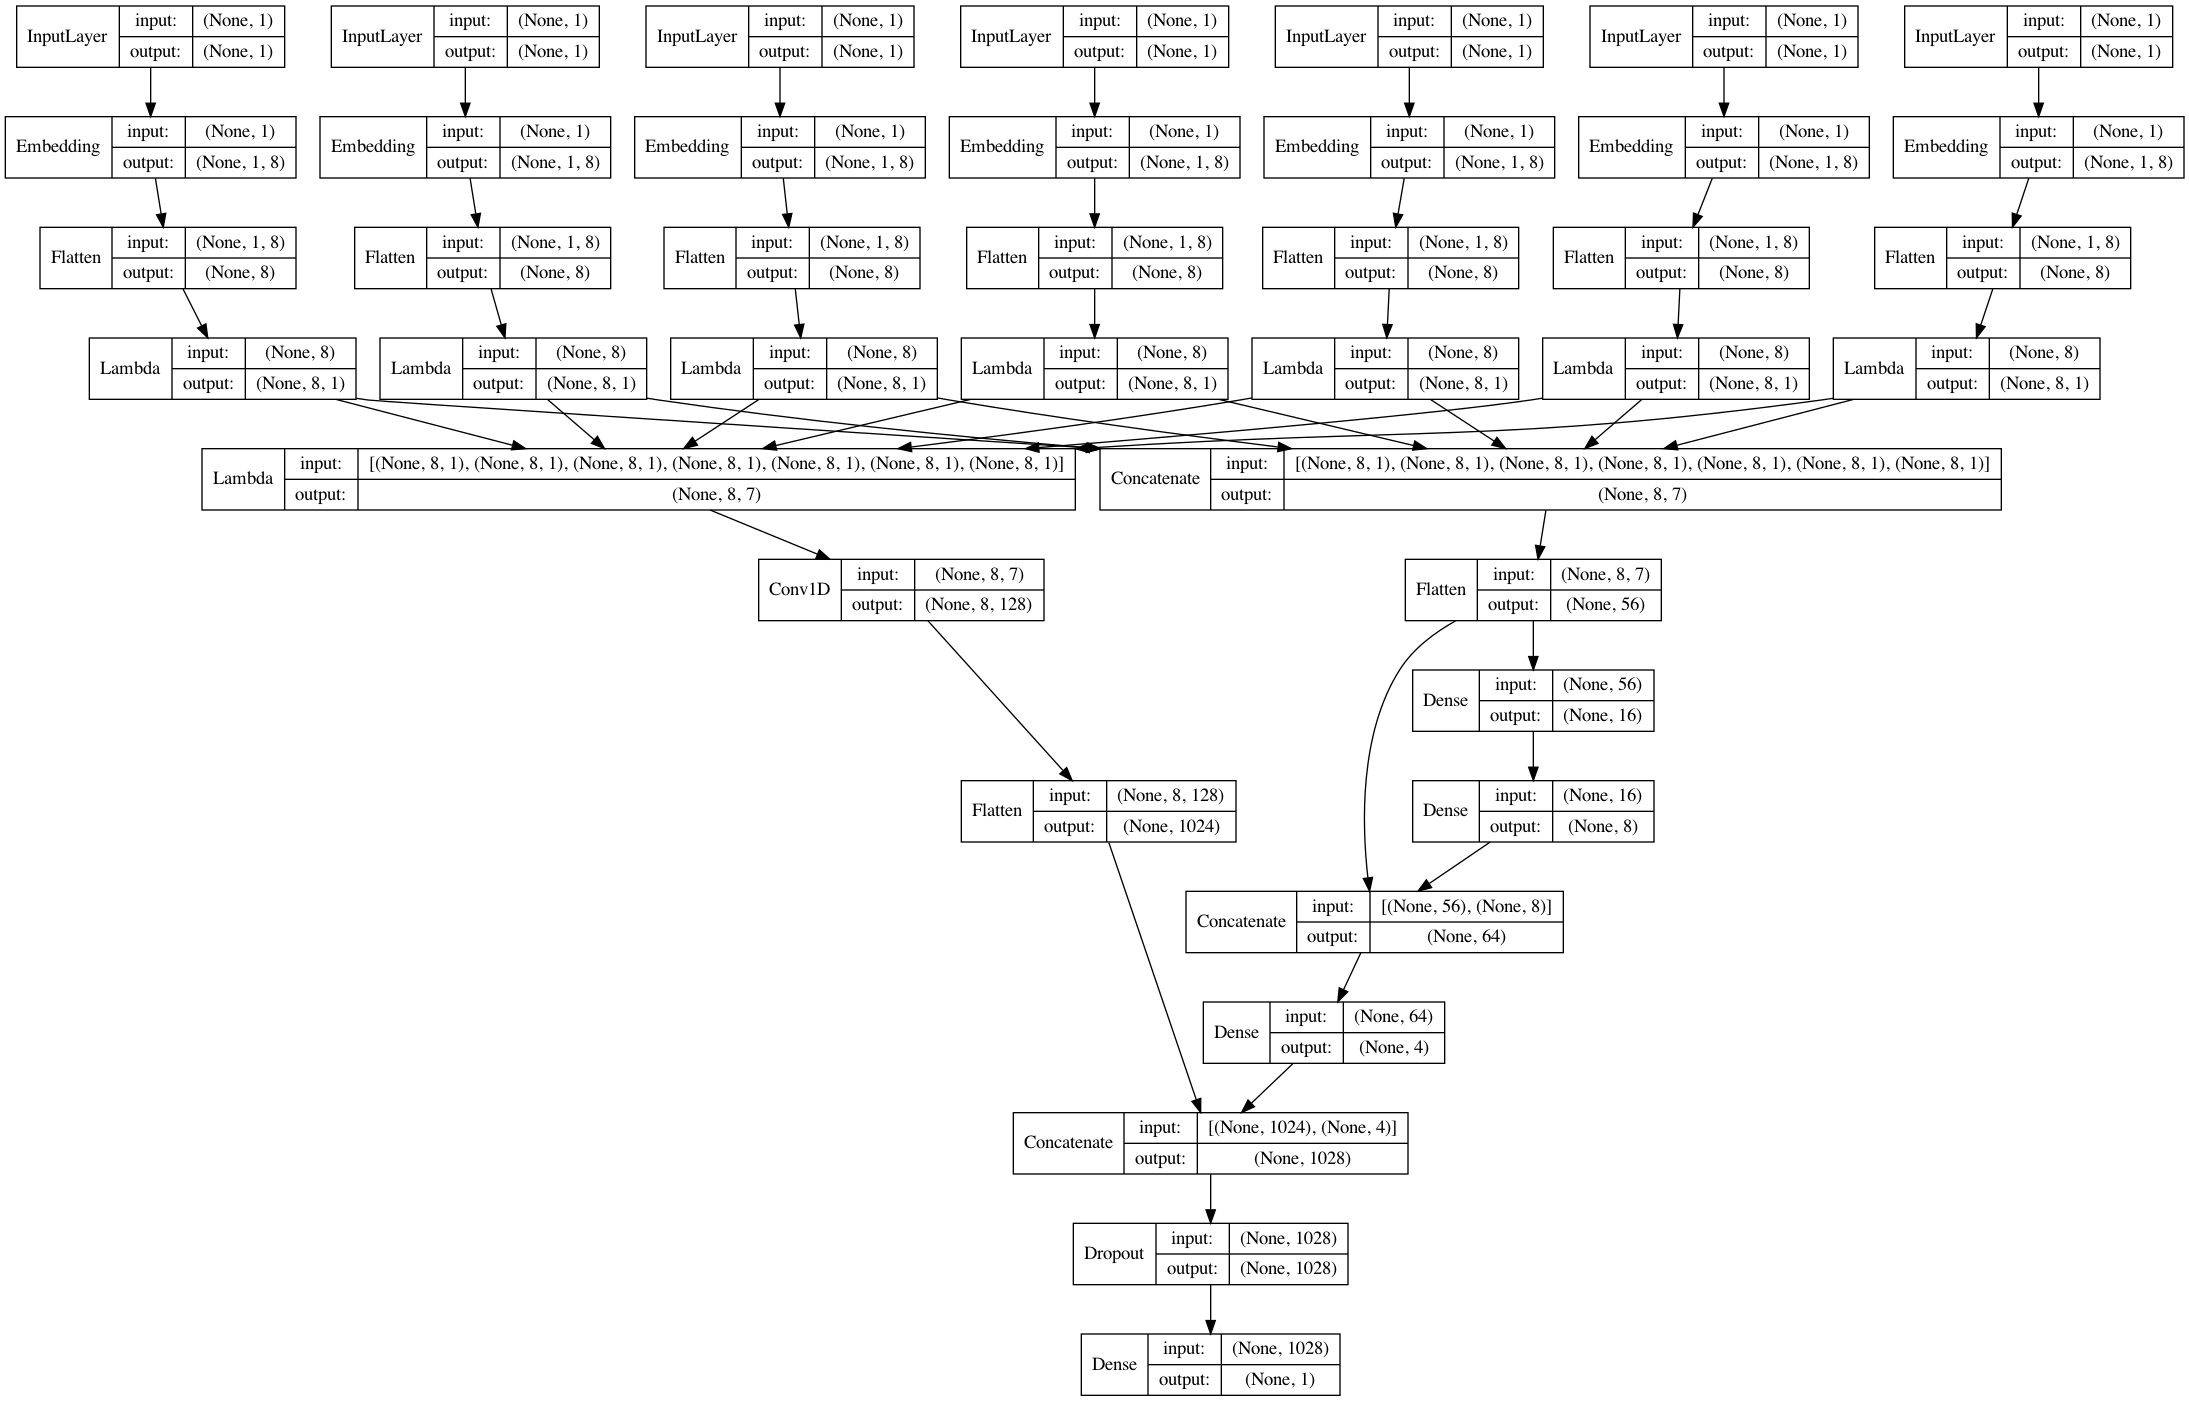

In [15]:
# Concatenate MF and MLP parts
predict_vector = Concatenate()([MF_part, mlp_concat])
predict_vector = Dropout(0.2)(predict_vector)

# Final prediction layer
prediction = Dense(1, name = "prediction")(predict_vector) # activation='sigmoid',
model = Model([userID, users_mean_rating, 
                             user_reviewcount, locationId, placeType,
                             createdDate, photonum], prediction)
model.compile(loss="mse", optimizer=RMSprop(lr=1e-3), metrics=[tf.keras.metrics.AUC()])

Image(model_to_dot(model,show_shapes=True, show_layer_names=False).create(prog='dot', format='png'))

Train on 43077 samples, validate on 217 samples
Epoch 1/20
43077/43077 [==============================] - 1s 30us/step - loss: 13.9153 - auc: 0.0000e+00 - val_loss: 7.7136 - val_auc: 0.0000e+00
Epoch 2/20
43077/43077 [==============================] - 1s 17us/step - loss: 4.0231 - auc: 0.0000e+00 - val_loss: 1.0940 - val_auc: 0.0000e+00
Epoch 3/20
43077/43077 [==============================] - 1s 16us/step - loss: 0.7404 - auc: 0.0000e+00 - val_loss: 0.6471 - val_auc: 0.0000e+00
Epoch 4/20
43077/43077 [==============================] - 1s 16us/step - loss: 0.5615 - auc: 0.0000e+00 - val_loss: 0.5252 - val_auc: 0.0000e+00
Epoch 5/20
43077/43077 [==============================] - 1s 15us/step - loss: 0.4534 - auc: 0.0000e+00 - val_loss: 0.4855 - val_auc: 0.0000e+00
Epoch 6/20
43077/43077 [==============================] - 1s 15us/step - loss: 0.3995 - auc: 0.0000e+00 - val_loss: 0.3833 - val_auc: 0.0000e+00
Epoch 7/20
43077/43077 [==============================] - 1s 15us/step - loss: 0.

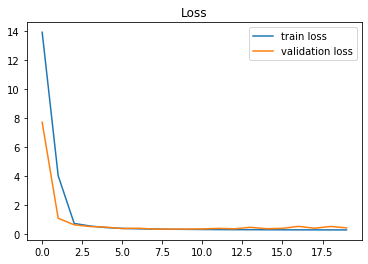

In [18]:
history = model.fit(x=[encoded_userID, encoded_users_mean_rating, 
                             encoded_user_reviewcount, encoded_locationId, encoded_placeType,
                             encoded_createdDate, encoded_photonum],
                    y=local_df['rating'], batch_size=2048, epochs=20, validation_split=0.005, verbose=1)

plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend() 
plt.title("Loss")
plt.show()

In [21]:
# import time
# startTime = time.time()

# a = model.predict([encoded_userID, encoded_users_mean_rating, 
#                              encoded_user_reviewcount, encoded_locationId, encoded_placeType,
#                              encoded_createdDate, encoded_photonum])

# endTime = time.time() - startTime 
# print(endTime)

0.9618220329284668


In [22]:
model.save('local_v0602.h5')

## 2. global model

In [23]:
encoded_userID, num_userID, vocab_userID = get_data('userID', global_df)

encoded_users_mean_rating, num_users_mean_rating, vocab_users_mean_rating = get_data('users_mean_rating', global_df)

encoded_user_reviewcount,  num_user_reviewcount, vocab_user_reviewcount = get_data('user_reviewcount', global_df)

encoded_locationId, num_locationId, vocab_locationId = get_data('locationId', global_df)
encoded_placeType,  num_placeType, vocab_placeType = get_data('placeType', global_df)

encoded_createdDate,  num_createdDate, vocab_createdDate = get_data('createdDate', global_df)
encoded_photonum,  num_photonum, vocab_photonum = get_data('photonum', global_df)

In [24]:
n_factors = 8
layers = [16,8, 4]

# Input variables
userID = Input(shape=(1,), dtype='int64', name = 'userID')

users_mean_rating = Input(shape=(1,), dtype='int64', name = 'users_mean_rating')

user_reviewcount = Input(shape=(1,), dtype='int64', name = 'user_reviewcount')

locationId = Input(shape=(1,), dtype='int64', name = 'locationId')
placeType = Input(shape=(1,), dtype='int64', name = 'placeType')

createdDate = Input(shape=(1,), dtype='int64', name = 'createdDate')
photonum = Input(shape=(1,), dtype='int64', name = 'photonum')

In [25]:
FM_userID = Embedding(input_dim = num_userID, output_dim = n_factors, 
                              name = 'FM_userID', input_length=1)(userID)

FM_users_mean_rating = Embedding(input_dim = num_users_mean_rating, output_dim = n_factors,
                              name = 'FM_users_mean_rating', input_length=1)(users_mean_rating)  

FM_user_reviewcount = Embedding(input_dim = num_user_reviewcount, output_dim = n_factors, 
                              name = 'FM_user_reviewcount', input_length=1)(user_reviewcount)

FM_locationId= Embedding(input_dim = num_locationId, output_dim = n_factors,
                              name = 'FM_locationId', input_length=1)(locationId)   
FM_placeType = Embedding(input_dim = num_placeType, output_dim = n_factors,
                              name = 'FM_placeType', input_length=1)(placeType)  

FM_createdDate = Embedding(input_dim = num_createdDate, output_dim = n_factors, 
                              name = 'FM_createdDate', input_length=1)(createdDate)
FM_photonum = Embedding(input_dim = num_photonum, output_dim = n_factors, 
                              name = 'FM_photonum', input_length=1)(photonum)

In [26]:
FM_userID_latent = Flatten()(FM_userID)
FM_userID_latent = Lambda(trans_mul)(FM_userID_latent)

FM_users_mean_rating_latent = Flatten()(FM_users_mean_rating)
FM_users_mean_rating_latent = Lambda(trans_mul)(FM_users_mean_rating_latent)

FM_user_reviewcount_latent = Flatten()(FM_user_reviewcount)
FM_user_reviewcount_latent = Lambda(trans_mul)(FM_user_reviewcount_latent)

FM_locationId_latent = Flatten()(FM_locationId)
FM_locationId_latent = Lambda(trans_mul)(FM_locationId_latent)

FM_placeType_latent = Flatten()(FM_placeType)
FM_placeType_latent = Lambda(trans_mul)(FM_placeType_latent)

FM_createdDate_latent = Flatten()(FM_createdDate)
FM_createdDate_latent = Lambda(trans_mul)(FM_createdDate_latent)

FM_photonum_latent = Flatten()(FM_photonum)
FM_photonum_latent = Lambda(trans_mul)(FM_photonum_latent)

FM_conv1d =Lambda(concat_shape2D)([FM_userID_latent, FM_users_mean_rating_latent,
                             FM_user_reviewcount_latent, FM_locationId_latent, FM_placeType_latent,
                             FM_createdDate_latent, FM_photonum_latent])


MF_part = Conv1D(128,kernel_size=1,activation='relu')(FM_conv1d)
MF_part = Flatten()(MF_part)

In [27]:
mlp_concat = Concatenate()([FM_userID_latent, FM_users_mean_rating_latent,
                             FM_user_reviewcount_latent, FM_locationId_latent, FM_placeType_latent,
                             FM_createdDate_latent, FM_photonum_latent])
mlp_concat = Flatten()(mlp_concat)

mlp_concat1 = Dense(layers[0], activation='relu', name=f"layer{0}")(mlp_concat) 
mlp_concat1 = Dense(layers[1], activation='relu', name=f"layer{1}")(mlp_concat1)
mlp_concat = Concatenate()([mlp_concat,mlp_concat1])
mlp_concat = Dense(layers[2],activation='relu')(mlp_concat)

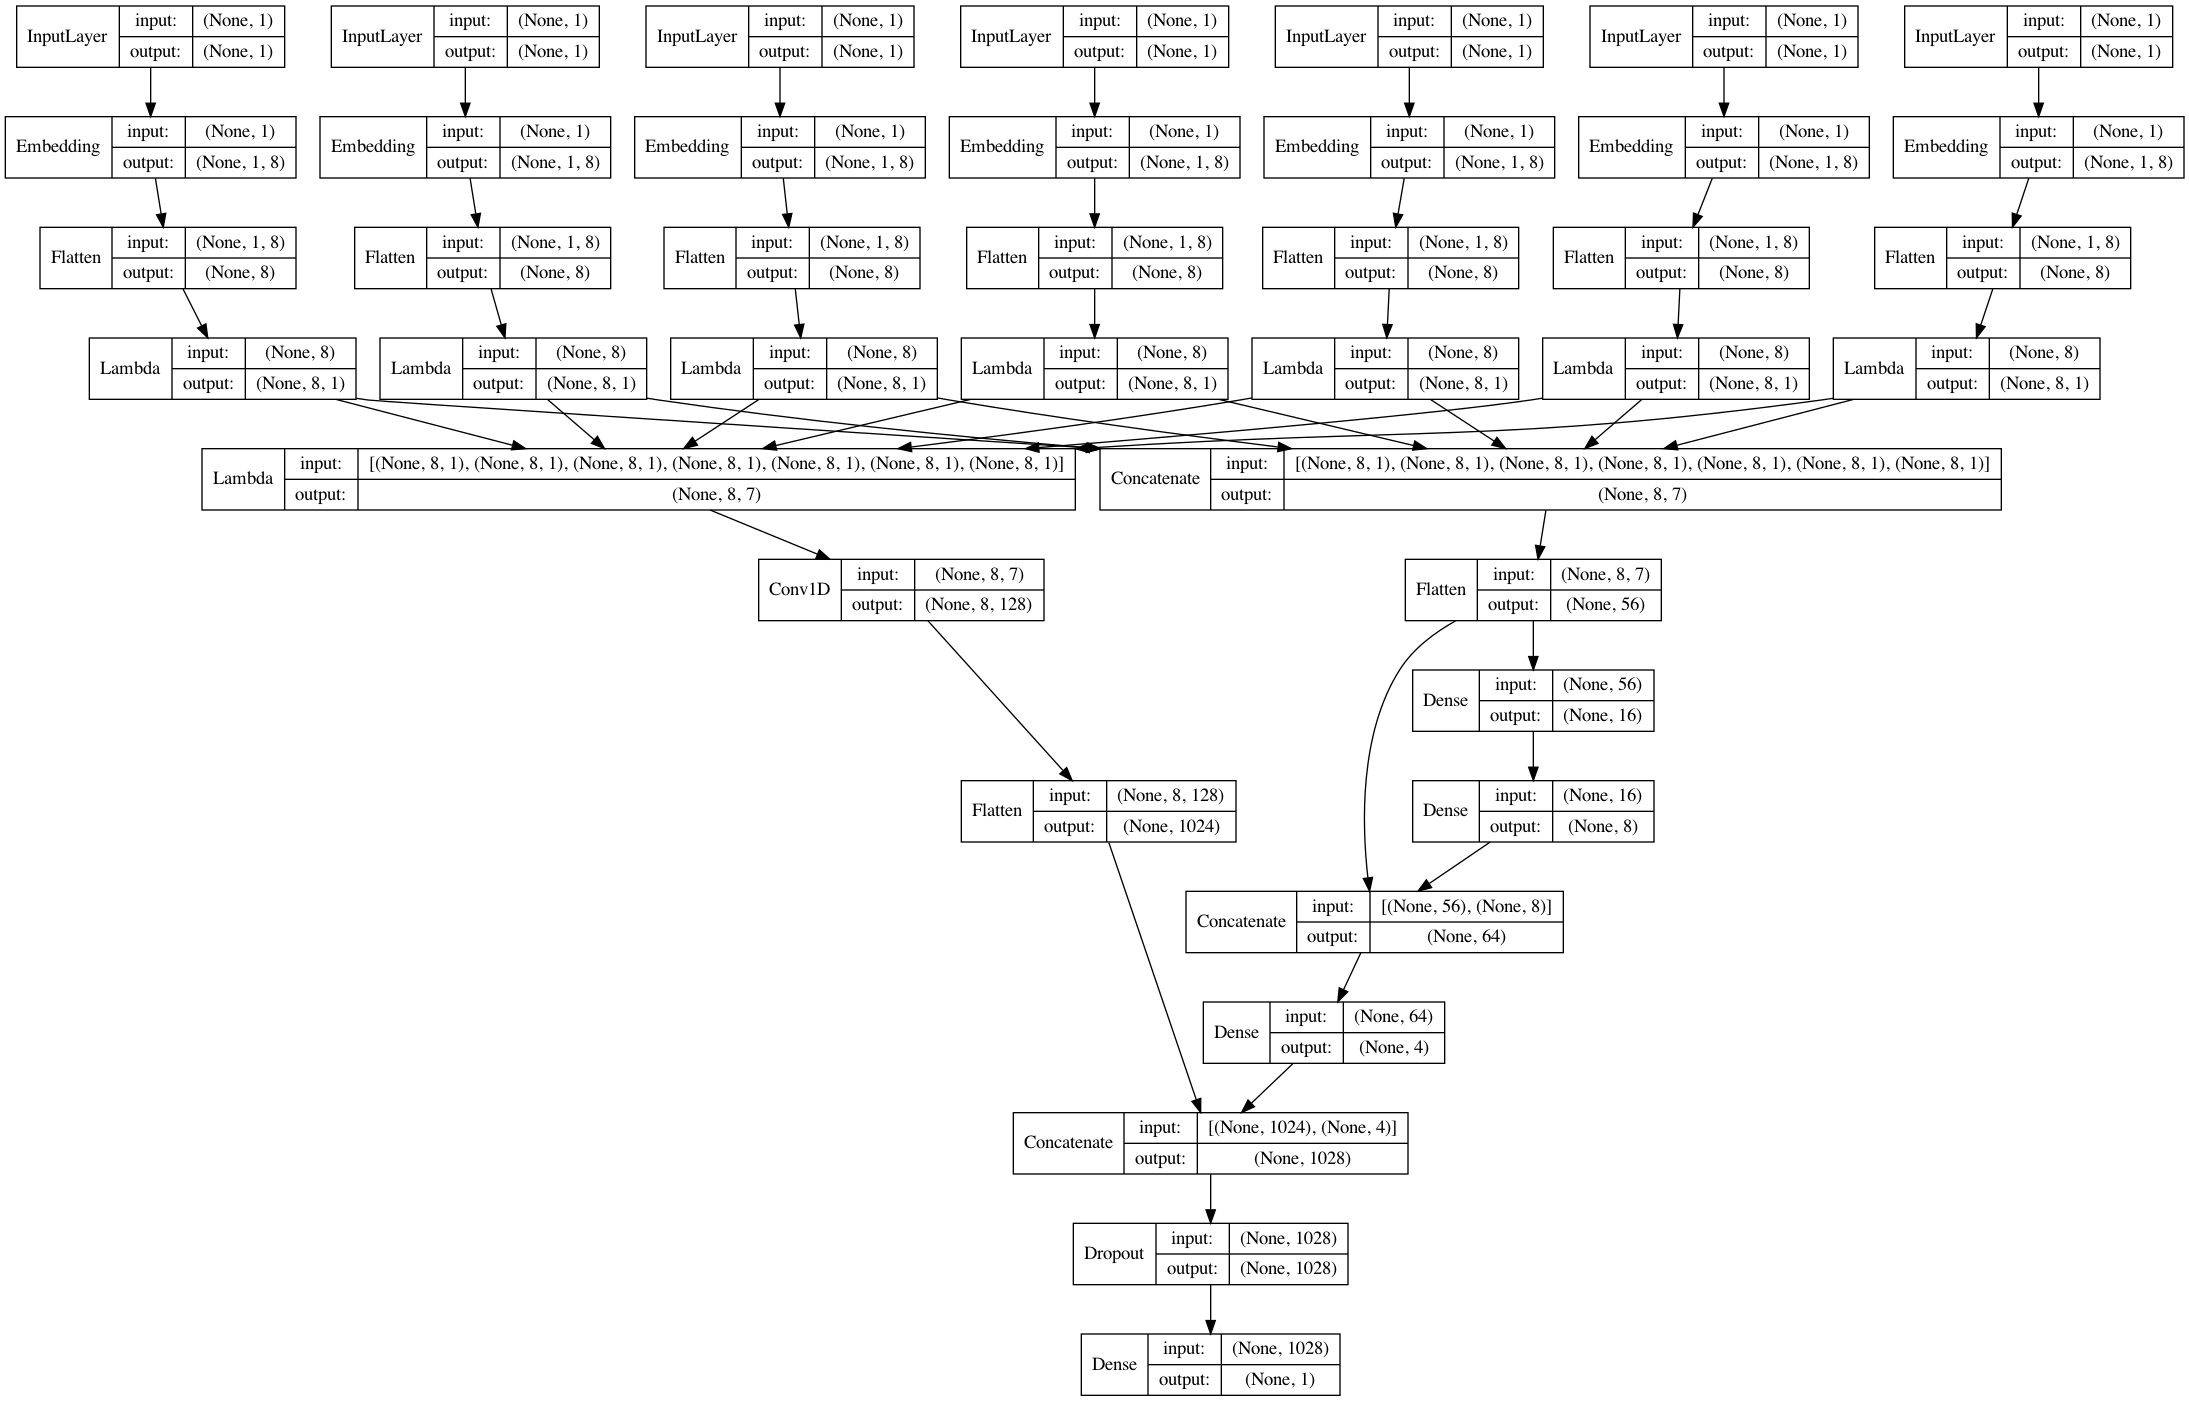

In [28]:
# Concatenate MF and MLP parts
predict_vector = Concatenate()([MF_part, mlp_concat])
predict_vector = Dropout(0.2)(predict_vector)

# Final prediction layer
prediction = Dense(1, name = "prediction")(predict_vector) # activation='sigmoid',
model = Model([userID, users_mean_rating, 
                             user_reviewcount, locationId, placeType,
                             createdDate, photonum], prediction)
model.compile(loss="mse", optimizer=RMSprop(lr=1e-3), metrics=[tf.keras.metrics.AUC()])

Image(model_to_dot(model,show_shapes=True, show_layer_names=False).create(prog='dot', format='png'))

Train on 93725 samples, validate on 471 samples
Epoch 1/20
93725/93725 [==============================] - 2s 24us/step - loss: 8.7809 - auc_1: 0.0000e+00 - val_loss: 0.9723 - val_auc_1: 0.0000e+00
Epoch 2/20
93725/93725 [==============================] - 2s 18us/step - loss: 0.5929 - auc_1: 0.0000e+00 - val_loss: 0.4100 - val_auc_1: 0.0000e+00
Epoch 3/20
93725/93725 [==============================] - 2s 19us/step - loss: 0.3001 - auc_1: 0.0000e+00 - val_loss: 0.2474 - val_auc_1: 0.0000e+00
Epoch 4/20
93725/93725 [==============================] - 2s 20us/step - loss: 0.2390 - auc_1: 0.0000e+00 - val_loss: 0.2123 - val_auc_1: 0.0000e+00
Epoch 5/20
93725/93725 [==============================] - 2s 20us/step - loss: 0.2279 - auc_1: 0.0000e+00 - val_loss: 0.2062 - val_auc_1: 0.0000e+00
Epoch 6/20
93725/93725 [==============================] - 2s 22us/step - loss: 0.2229 - auc_1: 0.0000e+00 - val_loss: 0.2038 - val_auc_1: 0.0000e+00
Epoch 7/20
93725/93725 [==============================] - 

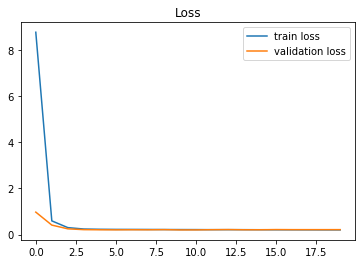

In [29]:
history = model.fit(x=[encoded_userID, encoded_users_mean_rating, 
                             encoded_user_reviewcount, encoded_locationId, encoded_placeType,
                             encoded_createdDate, encoded_photonum],
                    y=global_df['rating'], batch_size=2048, epochs=20, validation_split=0.005, verbose=1)

plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend() 
plt.title("Loss")
plt.show()

In [30]:
model.save('global_v0602.h5')

# 4. EMbedding 추출

# 5. Embedding 시각화

# 6. itme 유사도